# Volume 4: Predator-Prey Models
    Daniel Perkins
    MATH 437
    9/15/24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The `solve_ivp` solver requires a callable function representing the right hand side of the IVP.

Define the function `predator_prey()` that accepts the current $r(t)$ and $w(t)$ values as a 1d array $y$, the current time $t$, the parameters $\alpha, \beta, \delta$, and $\gamma$,
and returns the right hand side of the ODE as a tuple.

In [2]:
def predator_prey(t, y, alpha, beta, gamma, delta):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    r, w = y  # Unpack y
    r_prime = r*(alpha - beta*w) # The ODE equations
    w_prime = w*(-delta + gamma*r)
    return r_prime, w_prime

# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. 
Use $\alpha=1.0$, $\beta=0.5$, $\delta=0.75$, and $\gamma=0.25$ as your growth parameters.
Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

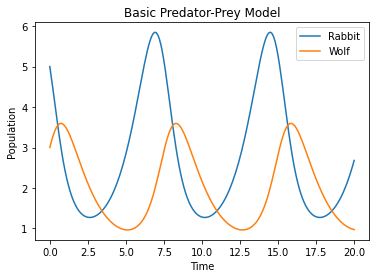

In [11]:
# Set up initial values
alpha = 1.0
beta = 0.5
delta = 0.75
gamma = 0.25
def ode(t, y):
    return np.array(predator_prey(t, y, alpha, beta, gamma, delta))

# Solve the ODE
t_span = (0, 20)
y0 = np.array([5, 3])
sol = solve_ivp(ode, t_span, y0, max_step=0.1)

# Plot it
plt.title("Basic Predator-Prey Model")
plt.xlabel('Time')
plt.ylabel("Population")
plt.plot(sol.t,sol.y[0], label="Rabbit")
plt.plot(sol.t,sol.y[1], label="Wolf")
plt.legend()
plt.show()

# Problem 3

Similar to Problem 1, define a function `lotka_volterra()` that takes in the current time $t$, the current predator and prey populations as a 1d array $y$, and the growth parameter $\eta$, and returns the right hand side of the nondimensional Lotka-Volterra system.

Plot the phase portrait and several solutions of this ODE for $\eta=1/3$.
Using `solve_ivp`, solve the ODE with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0=(1/2, 3/4)$, and $y_0=(1/16, 3/4)$ and time domain $t = [0,13]$. Plot these three solutions on the same graph as the phase portrait.
Also plot the equilibria $(0,0)$ and $(1,1)$ as points.

Since your solutions are being plotted with the phase portrait, plot the two populations against each other (instead of both individually against time). Compare your result with the example in the lab PDF.

In [59]:
def lotka_volterra(t, y, eta):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        eta (float): The model parameter.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    U, V = y   # Unpack y
    U_prime = U*(1 - V)   # The ODEs (after changing variables)
    V_prime = eta*V*(U - 1)
    return U_prime, V_prime

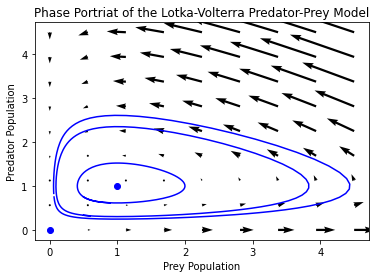

In [60]:
# Solve the ODEs
eta = 1/3.
def ode(t, y):
    return np.array(lotka_volterra(t, y, eta))
t_span = (0, 13)
y1 = np.array([1/2., 1/3.])
y2 = np.array([1/2., 3/4.])
y3 = np.array([1/16., 3/4.])
sol1 = solve_ivp(ode, t_span, y1, max_step=0.1)
sol2 = solve_ivp(ode, t_span, y2, max_step=0.1)
sol3 = solve_ivp(ode, t_span, y3, max_step=0.1)

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0, 4.5, 9), np.linspace(0, 4.5, 9))
dU, dV = lotka_volterra(0, (Y1, Y2), eta)
Q = plt.quiver(Y1, Y2, dU, dV)
# Rest of the plot
plt.title("Phase Portriat of the Lotka-Volterra Predator-Prey Model")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.plot(sol1.y[0], sol1.y[1], c="blue")
plt.plot(sol2.y[0], sol2.y[1], c="blue")
plt.plot(sol3.y[0], sol3.y[1], c="blue")
plt.scatter(1, 1, c="blue")
plt.scatter(0, 0, c="blue")
plt.show()

# Problem 4

Define a new function `logistic_model()` that takes in the current time $t$, the current predator and prey populations $y$, the parameters $\eta$ and $\rho$, and returns the right hand side of the logistic model ODE as a tuple.

Use `solve_ivp` to compute solutions $(U,V)$ of the ODE
for initial conditions $(1/3, 1/3)$ and $(1/2, 1/5)$ with $(t_0,t_f)=(0,13)$.
Do this for parameter values $\eta=1$, $\rho = 0.3$ and also for values $\eta=1$, $\rho = 1.1$.

Create a phase portrait for the logistic equations for each set of parameter values.
Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

Hint: there are three equilibrium points for each set of parameter values.
However, you only need to plot the ones with nonnegative values of $U$ and $V$, as these are the only ones that correspond to physically-meaningful solutions.

In [61]:
def logistic_model(t, y, eta, rho):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        eta, rho (floats): Parameters of the system.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    U, V = y   # Unpack y
    U_prime = U*(1 - U - V)   # The ODEs (after changing variables)
    V_prime = eta*V*(U - rho)
    return U_prime, V_prime



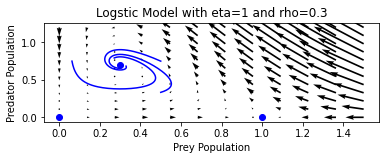

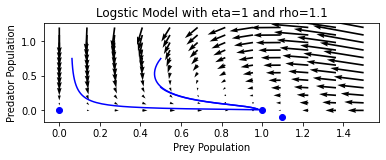

In [62]:
################ eta=1, rho=0.3 ################
eta = 1.
rho = 0.3
def ode(t, y):
    return np.array(logistic_model(t, y, eta, rho))
t_span = (0, 13)
y1 = np.array([1/2., 1/3.])
y2 = np.array([1/2., 3/4.])
y3 = np.array([1/16., 3/4.])
# Solve the ODEs
sol1 = solve_ivp(ode, t_span, y1, max_step=0.1)
sol2 = solve_ivp(ode, t_span, y2, max_step=0.1)
sol3 = solve_ivp(ode, t_span, y3, max_step=0.1)

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0, 1.5, 12), np.linspace(0, 1.2, 12))
dU, dV = logistic_model(0, (Y1, Y2), eta, rho)
plt.subplot(211)
Q = plt.quiver(Y1, Y2, dU, dV)
# The plot
plt.title("Logstic Model with eta=1 and rho=0.3")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.plot(sol1.y[0], sol1.y[1], c="blue")
plt.plot(sol2.y[0], sol2.y[1], c="blue")
plt.plot(sol3.y[0], sol3.y[1], c="blue")
# Equilibrium points
plt.scatter(0, 0, c="blue")
plt.scatter(1, 0, c="blue")
plt.scatter(rho, 1 - rho, c="blue")
plt.show()


################ eta=1, rho=1.1 ################
eta = 1.
rho = 1.1
def ode(t, y):
    return np.array(logistic_model(t, y, eta, rho))
t_span = (0, 13)
y1 = np.array([1/2., 1/3.])
y2 = np.array([1/2., 3/4.])
y3 = np.array([1/16., 3/4.])
# Solve the ODEs
sol1 = solve_ivp(ode, t_span, y1, max_step=0.1)
sol2 = solve_ivp(ode, t_span, y2, max_step=0.1)
sol3 = solve_ivp(ode, t_span, y3, max_step=0.1)

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0, 1.5, 12), np.linspace(0, 1.2, 12))
dU, dV = logistic_model(0, (Y1, Y2), eta, rho)
plt.subplot(212)
Q = plt.quiver(Y1, Y2, dU, dV)
# The plot
plt.title("Logstic Model with eta=1 and rho=1.1")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.plot(sol1.y[0], sol1.y[1], c="blue")
plt.plot(sol2.y[0], sol2.y[1], c="blue")
plt.plot(sol3.y[0], sol3.y[1], c="blue")
# Equilibrium points
plt.scatter(0, 0, c="blue")
plt.scatter(1, 0, c="blue")
plt.scatter(rho, 1 - rho, c="blue")
plt.show()

# Problem 5

Define a new function `two_prey_species()` that takes in the current time $t$, the current prey and predator populations $y$, the parameters $\alpha,\beta,\eta,\xi$, and $\rho$, and returns the right-hand-side of the two-prey-species model's ODE as a tuple.

Use `solve_ivp` to compute solutions $(U,V,W)$ of this ODE using the initial condition $(1/3,1/3,1/3)$, $(1/2,1/3,1/5)$, and $(1,1/10,1/2)$, with $(t_0,t_f)=(0,25)$.
Use parameter values $\eta=1$, $\rho=0.3$, $\xi=0.5$, $\alpha=0.2$, $\beta=0.1$.
Plot the numerical solutions for the populations as functions against time.

Do the dynamics predicted by this model seem realistic?
Write (in a markdown cell) your answer and reasoning behind it.

In [63]:
def two_prey_species(t, y, alpha, beta, eta, xi, rho):
    """Compute right hand side of two-prey-species predator-prey model based on
    rabbit, elk, and wolf populations at given time.
    
    Parameters:
        y ((3,) ndarray): A vector representing rabbit, elk, and wolf populations 
            at time t.
        t (float): Current time.
        alpha, beta, eta, xi, rho (float): Parameters of the system.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the model's ODE.
    """
    U, V, W = y   # Unpack y
    U_prime = U*(1 - U - V - W)   # The ODEs (after changing variables)
    V_prime = alpha*V*(1 - U - V) - beta*V*W
    W_prime = eta*W*(U + xi*V - rho)
    return U_prime, V_prime, W_prime

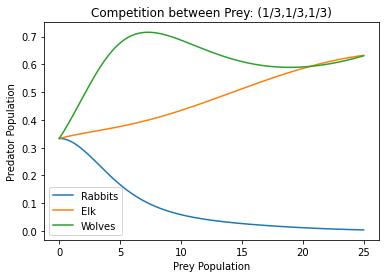

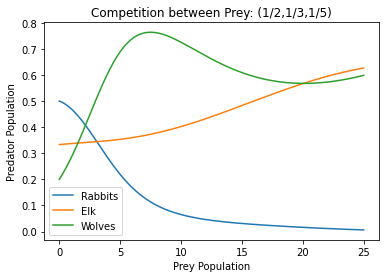

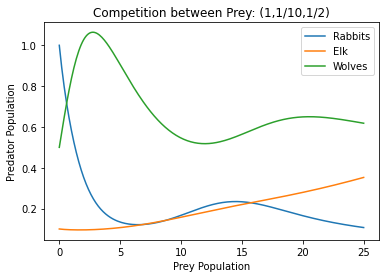

In [68]:
# Solve the ODEs
alpha = 0.2
beta = 0.1
eta = 1.
rho = 0.3
xi = 0.5
def ode(t, y):
    return np.array(two_prey_species(t, y, alpha, beta, eta, xi, rho))
t_span = (0, 25)
y1 = np.array([1/3., 1/3., 1/3.])
y2 = np.array([1/2., 1/3., 1/5.])
y3 = np.array([1., 1/10., 1/2.])
sol1 = solve_ivp(ode, t_span, y1, max_step=0.1)
sol2 = solve_ivp(ode, t_span, y2, max_step=0.1)
sol3 = solve_ivp(ode, t_span, y3, max_step=0.1)

# Plot for initial point 1
plt.title("Competition between Prey: (1/3,1/3,1/3)")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.plot(sol1.t, sol1.y[0], label="Rabbits")
plt.plot(sol1.t, sol1.y[1], label="Elk")
plt.plot(sol1.t, sol1.y[2], label="Wolves")
plt.legend()
plt.show()

# Plot for initial point 2
plt.title("Competition between Prey: (1/2,1/3,1/5)")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.plot(sol2.t, sol2.y[0], label="Rabbits")
plt.plot(sol2.t, sol2.y[1], label="Elk")
plt.plot(sol2.t, sol2.y[2], label="Wolves")
plt.legend()
plt.show()

# Plot for initial point 3
plt.title("Competition between Prey: (1,1/10,1/2)")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.plot(sol3.t, sol3.y[0], label="Rabbits")
plt.plot(sol3.t, sol3.y[1], label="Elk")
plt.plot(sol3.t, sol3.y[2], label="Wolves")
plt.legend()
plt.show()

### Do the dynamics predicted by this model seem realistic?

These models do seem realistic (or at least partially). For example, on the first plot, the number of wolves increases a lot at first because the prey populations are large. But eventually the rabbit population is so small, that the wolves slow down in growth. For some reason the elk population steadily grows. This must mean that they are eaten less or have a higher capacity in this case.

The pattern is similar in the second graph. And, it is even more prominent in the third. In the third graph, both rabbits and elk populations dorp so much that the wolves have nothing to eat. So, the wolf population decreased. But, because of this decrease, the prey population increased a little bit (until the wolves moved up again and ate them).

Overall, there is a pattern that makes sense. But, more analysis is needed to determine why the elk population is always increasing.